In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
df = pd.read_csv("deliveries.csv")
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

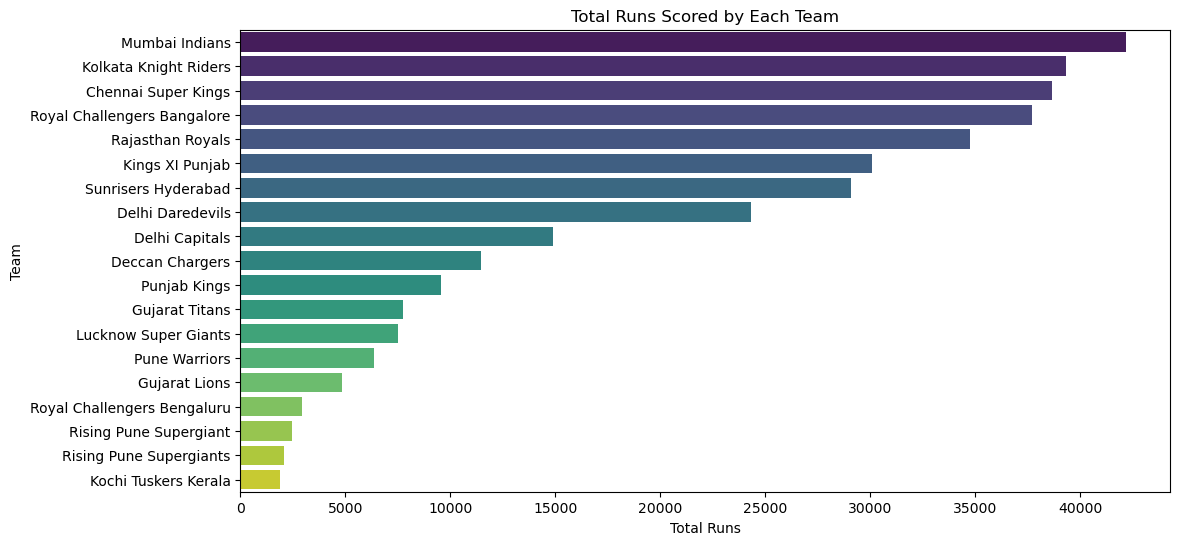

In [4]:
# 1. Find and visualize the total runs scored by each team.
team_runs = df.groupby("batting_team")["total_runs"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=team_runs.values, y=team_runs.index, palette="viridis")
plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.title("Total Runs Scored by Each Team")
plt.show()

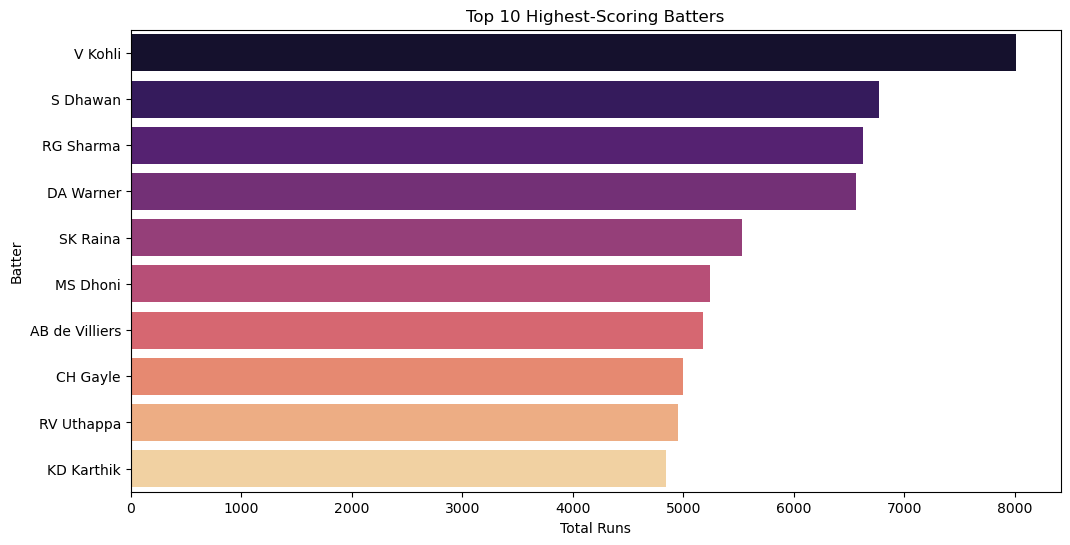

In [5]:
# 2. Identify and display the names of the top 10 highest-scoring batters with their total runs scored.
top_batters = df.groupby("batter")["batsman_runs"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_batters.values, y=top_batters.index, palette="magma")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.title("Top 10 Highest-Scoring Batters")
plt.show()

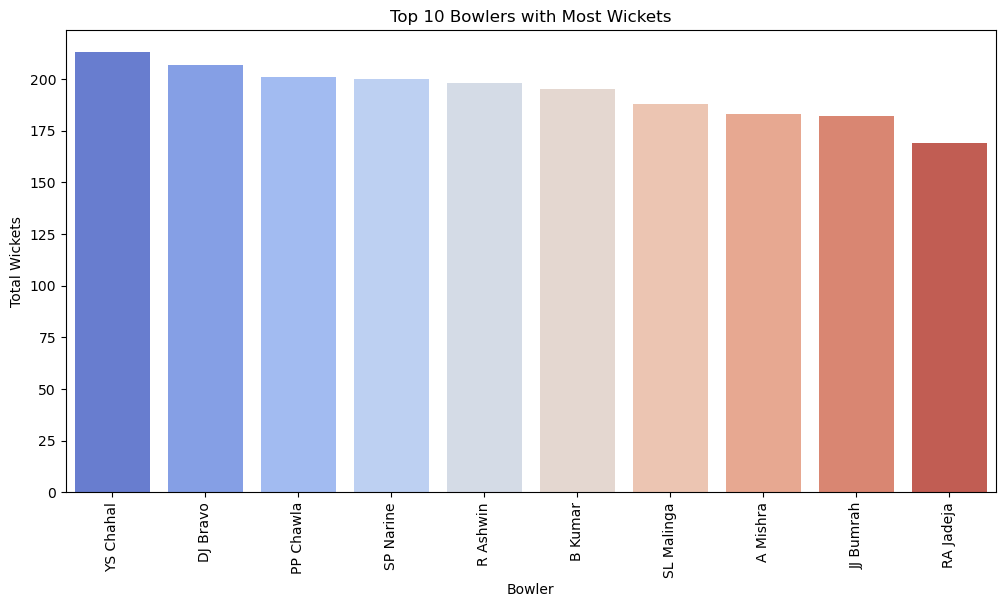

In [6]:
# 3. Find and visualize the top 10 bowlers with the most wickets.
top_bowlers = df[df["is_wicket"] == 1].groupby("bowler")["is_wicket"].count().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Bowler")
plt.ylabel("Total Wickets")
plt.title("Top 10 Bowlers with Most Wickets")
plt.show()

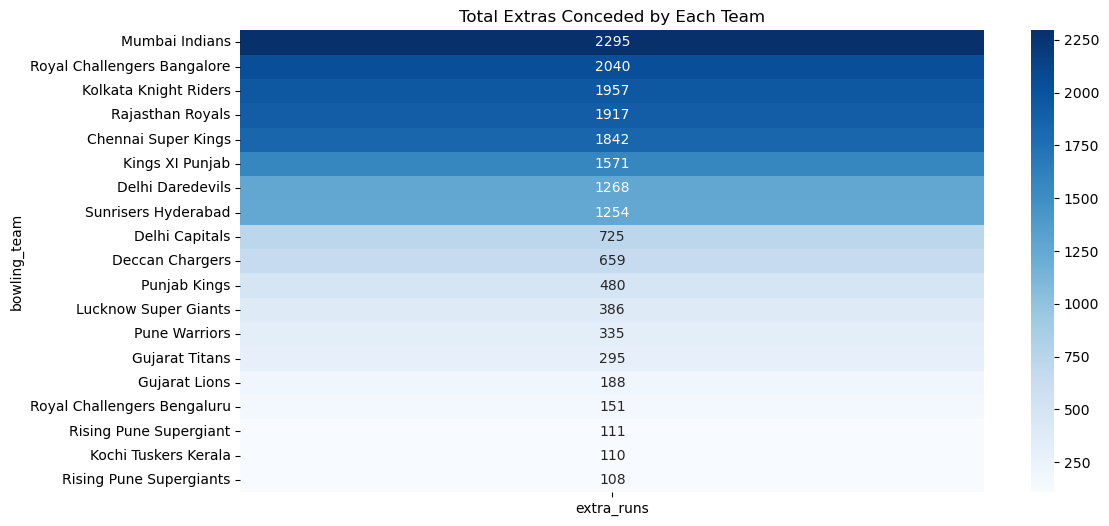

In [7]:
# 4. Tabulate and visualize the total number of extras conceded by each team.
team_extras = df.groupby("bowling_team")["extra_runs"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.heatmap(team_extras.to_frame(), annot=True, cmap="Blues", fmt="d")
plt.title("Total Extras Conceded by Each Team")
plt.show()

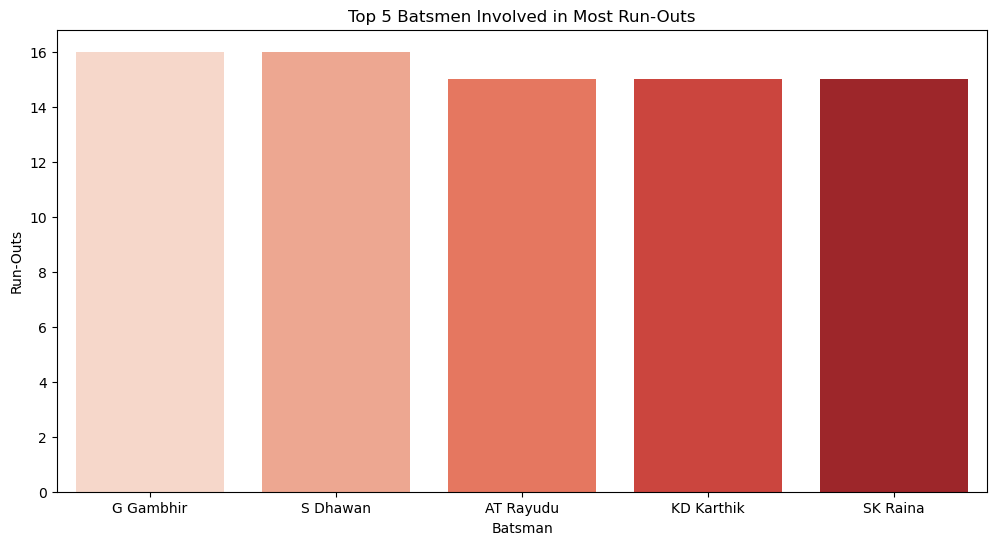

In [8]:
# 5. Tabulate and visualize the batsmen (top 5) involved in the most run-outs.
runouts = df[df["dismissal_kind"] == "run out"].groupby("player_dismissed")["dismissal_kind"].count().nlargest(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=runouts.index, y=runouts.values, palette="Reds")
plt.xlabel("Batsman")
plt.ylabel("Run-Outs")
plt.title("Top 5 Batsmen Involved in Most Run-Outs")
plt.show()

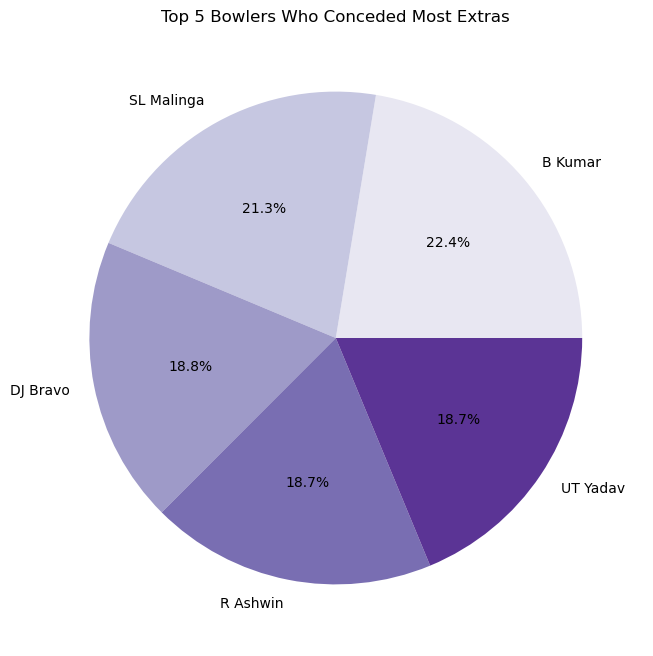

In [9]:
# 6. Tabulate and visualize the top 5 bowlers who conceded the most extras.
top_extra_bowlers = df.groupby("bowler")["extra_runs"].sum().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_extra_bowlers.values, labels=top_extra_bowlers.index, autopct='%1.1f%%', colors=sns.color_palette("Purples", 5))
plt.title("Top 5 Bowlers Who Conceded Most Extras")
plt.show()

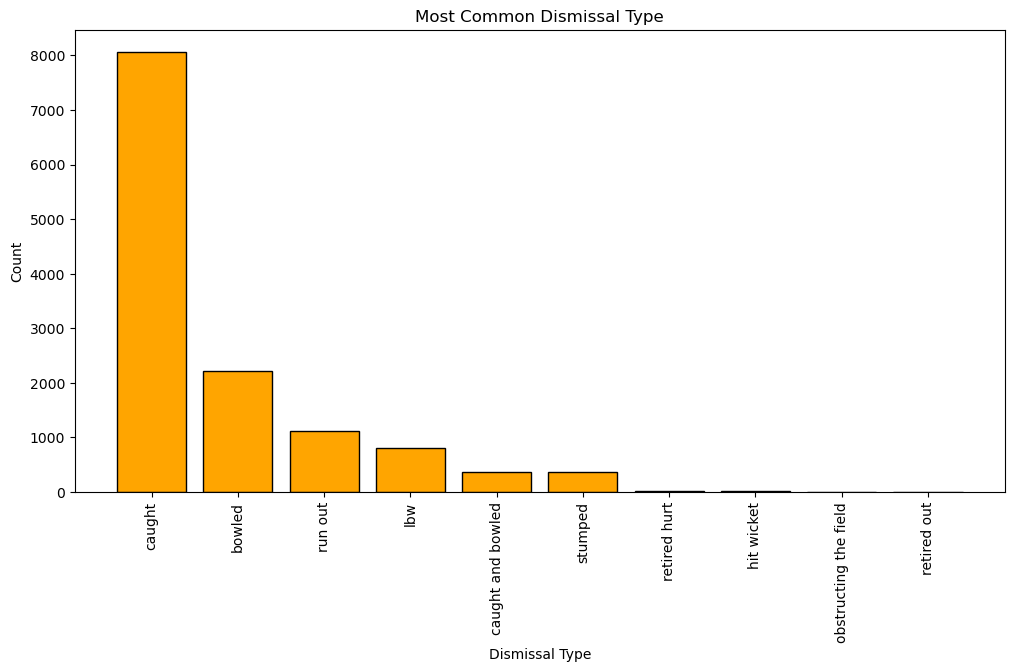

In [10]:
# 7. Tabulate and visualize the most common dismissal type.
dismissal_types = df["dismissal_kind"].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(dismissal_types.index, dismissal_types.values, color="orange", edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.title("Most Common Dismissal Type")
plt.show()

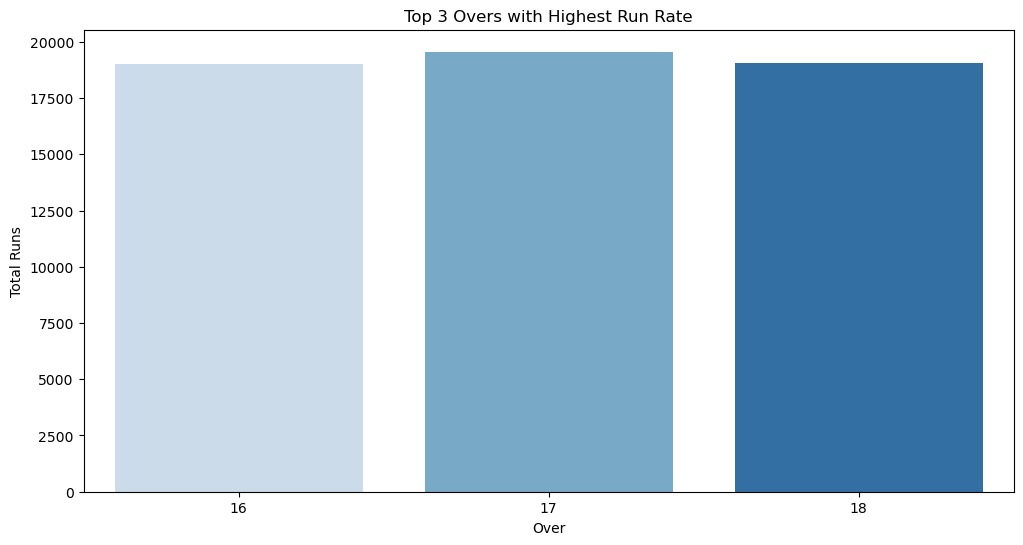

In [11]:
# 8. Find and display which of the top 3 overs has the highest run rate.
over_runrate = df.groupby("over")["total_runs"].sum().nlargest(3)
plt.figure(figsize=(12, 6))
sns.barplot(x=over_runrate.index, y=over_runrate.values, palette="Blues")
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.title("Top 3 Overs with Highest Run Rate")
plt.show()

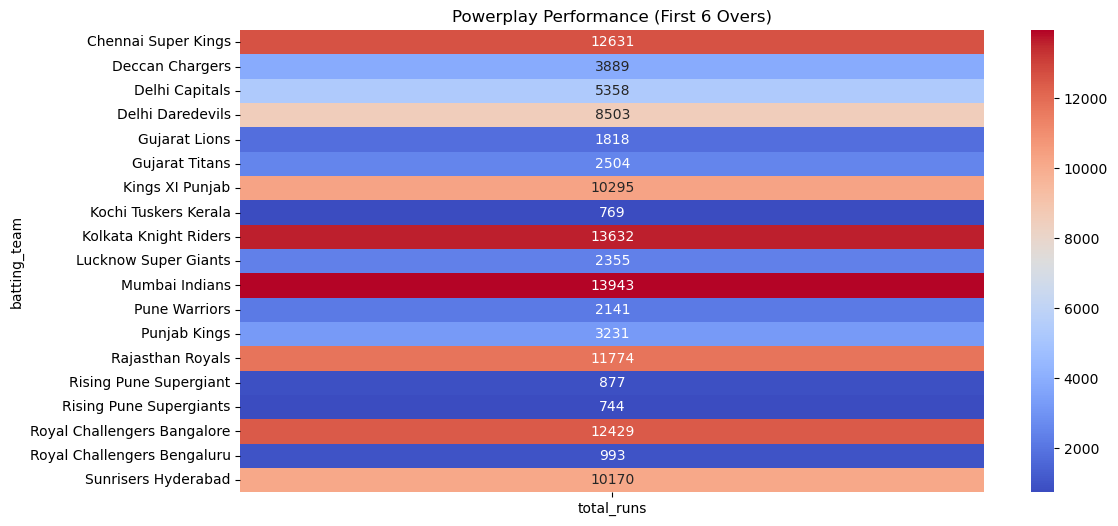

In [14]:
# 9. Analyze and visualize powerplay performance (first 6 overs).
powerplay = df[df["over"] <= 6].groupby("batting_team")["total_runs"].sum()
plt.figure(figsize=(12, 6))
sns.heatmap(powerplay.to_frame(), annot=True, cmap="coolwarm", fmt="d")
plt.title("Powerplay Performance (First 6 Overs)")
plt.show()

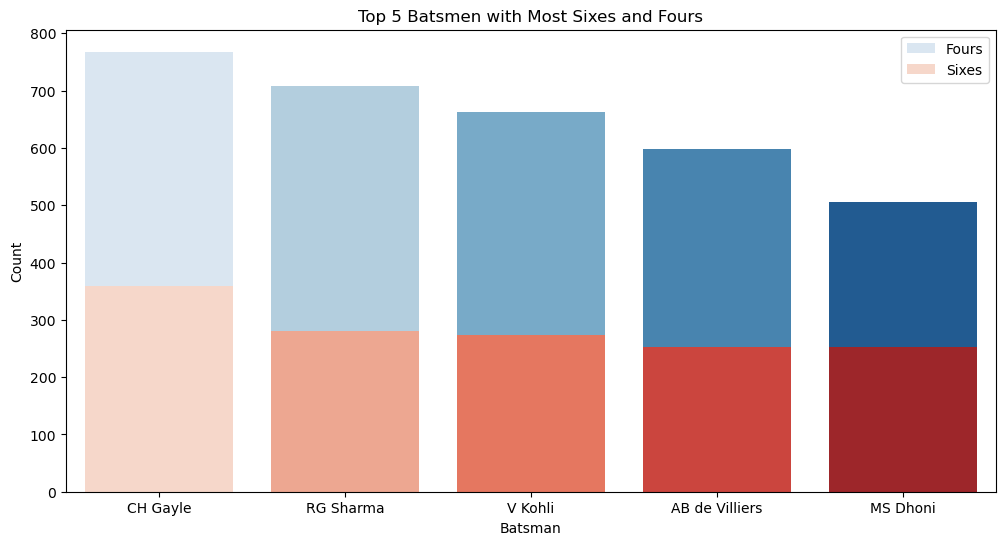

In [15]:
# 10. Tabulate and visualize the top 5 batsmen with the most sixes and fours.
fours = df[df["batsman_runs"] == 4].groupby("batter")["batsman_runs"].count().nlargest(5)
sixes = df[df["batsman_runs"] == 6].groupby("batter")["batsman_runs"].count().nlargest(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=fours.index, y=fours.values, palette="Blues", label="Fours")
sns.barplot(x=sixes.index, y=sixes.values, palette="Reds", label="Sixes")
plt.xlabel("Batsman")
plt.ylabel("Count")
plt.title("Top 5 Batsmen with Most Sixes and Fours")
plt.legend()
plt.show()
